In [32]:
import PIL
import torch
import torch.nn as nn
import cv2
from skimage.color import lab2rgb, rgb2lab, rgb2gray
from skimage import io
import matplotlib.pyplot as plt
import numpy as np

In [4]:
def show_output(grayscale_input, ab_input):
  '''Show/save rgb image from grayscale and ab channels
     Input save_path in the form {'grayscale': '/path/', 'colorized': '/path/'}'''
  color_image = torch.cat((grayscale_input, ab_input), 0).detach().numpy() # combine channels
  color_image = color_image.transpose((1, 2, 0))  # rescale for matplotlib
  color_image[:, :, 0:1] = color_image[:, :, 0:1] * 100
  color_image[:, :, 1:3] = color_image[:, :, 1:3] * 255 - 128   
  color_image = lab2rgb(color_image.astype(np.float64))
  grayscale_input = grayscale_input.squeeze().numpy()
  # plt.imshow(grayscale_input)
  # plt.imshow(color_image)
  return color_image


In [25]:
def colorize(img_path,print_img=True):
    img=cv2.imread(img_path)
    img=cv2.resize(img,(224,224))
    grayscale_input= torch.Tensor(rgb2gray(img))
    ab_input=model(grayscale_input.unsqueeze(0).unsqueeze(0)).squeeze(0)
    predicted=show_output(grayscale_input.unsqueeze(0), ab_input)
    plt.imshow(predicted)
    return predicted

In [30]:
model=torch.load("model-final.pth").cpu()

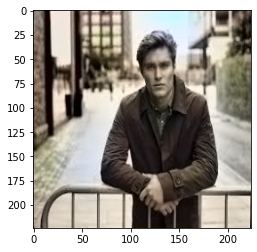

In [36]:
out=colorize(img_path="images.jpg",print_img=True)

In [35]:
plt.imsave("colored.png",out)